<a href="https://colab.research.google.com/github/syuan0525/image_process/blob/main/image_process3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import cv2
import numpy as np
import IPython.display as dp
from google.colab.patches import cv2_imshow

In [ ]:
pic1 = cv2.imread("1.jpg",1)

Bavg = pic1[:,:,0].mean()      # 白平衡
Gavg = pic1[:,:,1].mean()
Ravg = pic1[:,:,2].mean()

avg = Bavg + Gavg + Ravg

pic2 = pic1.copy()
pic2[:,:,0] = cv2.multiply(pic1[:,:,0], (avg/(Bavg*3)))
pic2[:,:,1] = cv2.multiply(pic1[:,:,1], (avg/(Gavg*3)))
pic2[:,:,2] = cv2.multiply(pic1[:,:,2], (avg/(Ravg*3)))

cv2_imshow(pic1)
cv2_imshow(pic2)

In [ ]:
pic1 = cv2.imread("p1.jpg",1)
# 影像二值化
# 變數一, 變數二=cv2.threshold(圖像變數, 門檻值, 最大值, 方法)
th, pic2 = cv2.threshold(pic1, 127, 255, cv2.THRESH_BINARY)
cv2_imshow(pic1)
cv2_imshow(pic2)

In [ ]:
th, pic2[:,:,0] = cv2.threshold(pic1[:,:,0], 0, 255, cv2.THRESH_BINARY|cv2.THRESH_OTSU)
print(th)
th, pic2[:,:,1] = cv2.threshold(pic1[:,:,1], 0, 255, cv2.THRESH_BINARY|cv2.THRESH_OTSU)
print(th)
th, pic2[:,:,2] = cv2.threshold(pic1[:,:,2], 0, 255, cv2.THRESH_BINARY|cv2.THRESH_OTSU)
print(th)
# cv2.THRESH_OTSU => 自動計算門檻值來做二值化，可配合其他方法使用 (只接受單一通道的色彩空間)
cv2_imshow(pic2)

In [ ]:
pic1 = cv2.imread("p1.jpg",1)
# 影像二值化(優化)
# 結果圖像=cv2.adaptiveThreshold(圖像變數,最大值,方法一,方法二,區塊大小,微調值)
pic2 = pic1.copy()
pic2[:,:,0] = cv2.adaptiveThreshold(
    pic1[:,:,0],
    255,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY,
    5,
    -2
)
pic2[:,:,1] = cv2.adaptiveThreshold(
    pic1[:,:,1],
    255,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY,
    5,
    -2
)
pic2[:,:,2] = cv2.adaptiveThreshold(
    pic1[:,:,2],
    255,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY,
    5, # 僅能是單數
    -2
)
cv2_imshow(pic1)
cv2_imshow(pic2)

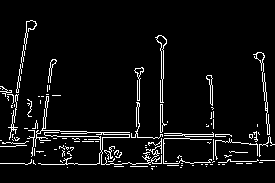

In [41]:
pic1 = cv2.imread("p3.jpg",1)
# 邊緣偵測
pic2 = cv2.Canny(pic1, 220, 255)
cv2_imshow(pic2)

In [ ]:
pic1 = cv2.imread("p4.jpg",1)
pic2 = cv2.blur(pic1,(10,10))   # 平均值模糊法
pic3 = cv2.medianBlur(pic1,15)  # 中值模糊法,純數值必須是單數

cv2_imshow(pic2)
cv2_imshow(pic3)

In [ ]:
pic1 = cv2.imread("p2.jpg",1)
pic2 = pic1.copy()
pic2[:,:,0] =cv2.equalizeHist(pic1[:,:,0]) # 銳利化,只能接受單一通道
pic2[:,:,1] =cv2.equalizeHist(pic1[:,:,1]) 
pic2[:,:,2] =cv2.equalizeHist(pic1[:,:,2])

cv2_imshow(pic1)
cv2_imshow(pic2)

In [ ]:
# 形態學
pic1 = cv2.imread("p2.jpg",1)
pic2 = cv2.erode(pic1, np.ones((15,15))) # 侵蝕(色彩值低的會侵蝕色彩值高的)
pic3 = cv2.dilate(pic1, np.ones((15,15))) # 膨脹(色彩值高的會侵蝕色彩值低的)
cv2_imshow(pic2)
cv2_imshow(pic3)

In [ ]:
pic1 = cv2.imread("1.jpg",1)  
"""
cv2.MORPH_OPEN：先執行侵蝕後執行膨脹
cv2.MORPH_CLOSE：先執行膨脹後執行侵蝕
cv2.MORPH_GRADIENT：執行膨脹與侵蝕產生的變化差
"""
pic2 = cv2.morphologyEx(pic1,cv2.MORPH_GRADIENT,np.ones((5,5)))
cv2_imshow(pic2)

In [ ]:
pic1 = cv2.imread("p4.jpg",1)
# 顏色篩選:判斷圖像裡的各項素是否在指定色彩範圍內
# 結果圖像=cv2.inRange(圖像變數, 顏色下限, 顏色上限)
pic2 = cv2.inRange(pic1, (200,200,200),(255,255,255))

cv2_imshow(pic1)
cv2_imshow(pic2)

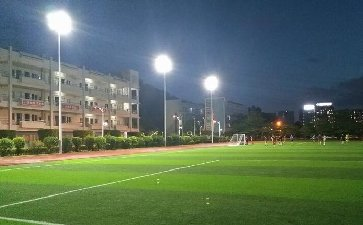

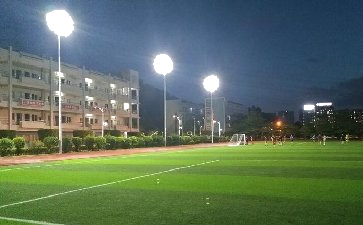

In [71]:
# 去除大型雜訊
pic1 = cv2.imread("p1.jpg",1)
pic2 = cv2.inRange(pic1, (200,200,200),(255,255,255))
pic2 = cv2.cvtColor(pic2, cv2.COLOR_GRAY2BGR)
pic3 = cv2.add(pic1, pic2)
cv2_imshow(pic1)
cv2_imshow(pic3)

大小:  36.0
大小:  13.0
大小:  2.0
大小:  223.5
大小:  368.5
大小:  709.0
亮燈數量:  6


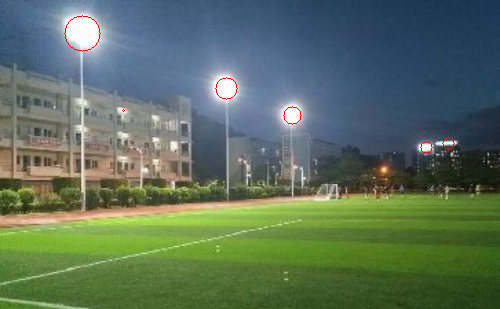

In [144]:
def resize(picture,weight):
  w = weight
  h = int(picture.shape[0]/(picture.shape[1]/w))
  picture2 = cv2.resize(picture, (w,h))
  return picture2

pic1 = cv2.imread("p1.jpg",1)
pic1 = resize(pic1, 500) 
pic2 = cv2.inRange(pic1, (240,240,240),(255,255,255))
# pic2 = cv2.dilate(pic2, np.ones((5,5)))
pic2 = cv2.morphologyEx(pic2,cv2.MORPH_OPEN,np.ones((2,2)))

# cv2_imshow(pic1)
# cv2_imshow(pic2)
# 取得輪廓
# 輪廓點, 輪廓階層資料=cv2.findContours(圖像變數(灰階圖像),類型,方法) 黑白圖為主
scr , date = cv2.findContours(pic2, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
# 繪製輪廓
# cv2.drawContours(圖像變數,存取全部輪廓的變數,要繪製的輪廓索引,顏色,粗細)
# cv2.drawContours(pic1, scr, -1, (0,0,255),2)  # -1:代表全部
# print("輪廓數量: ",len(scr))
# 取得包覆指定輪廓點的最小正矩形
bright = 0
for i in range(0,len(scr),1):
  (x, y), radius = cv2.minEnclosingCircle(scr[i])
  center = (int(x), int(y))
  radius = int(radius)
  area = cv2.contourArea(scr[i])  # 輪廓面積
  print("大小: ", area)
  # if not area < 100:
  cv2.circle(pic1, center, radius, (0, 0, 255), 1)
  bright += 1

# for i in range(0,len(scr),1):
#   x, y, w, h = cv2.boundingRect(scr[i])
#   area = w * h  
#   if not area < 20:
#   # X座標, Y座標, 寬度, 高度 =cv2.boundingRect(指定的輪廓)
#     cv2.rectangle(pic1, (x,y), (x+w,y+h),(0,0,255), 2)
#     bright += 1
print("亮燈數量: ",bright)
cv2_imshow(pic1)
